In [52]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd
import numpy as np
import string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sn

from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [30]:
path = 'train_test_dataset.csv'
df_positive_negative = pd.read_csv(path)
df_positive_negative.head()

,tweets,label,preprocess_tweets
0,"Correct that's because, Mr #Blair you never go...",leave,correct that's because mr <hashtag> you never ...
1,Safer In #EU? No! No! No! Terrorists want the ...,leave,safer in <hashtag> no no no terrorists want th...
2,This. https://t.co/WRtzpWsxiT,leave,this <url>
3,We're going to be swamped by Turks and other f...,leave,we're going to be swamped by turks and other f...
4,#Lexit not #brexit! Public event with great sp...,leave,<hashtag> not <hashtag> public event with grea...


In [31]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_positive_negative['preprocess_tweets'], df_positive_negative['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [32]:
train_x.shape, valid_x.shape

((375,), (125,))

### Feature Engineering

#### Use TF-IDF Vectors as features

In [33]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df_positive_negative['tweets'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


### Implement Classifier

In [34]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y), metrics.confusion_matrix(predictions, valid_y)

### Apply Linear Regression on initial db

LR ACCURACY:  0.52


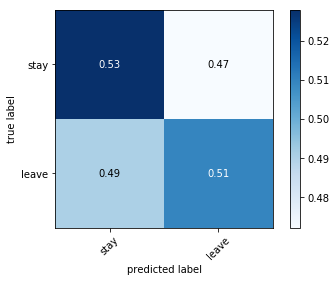

In [62]:
# Linear Classifier on Word Vectors
accuracy, cm = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print("LR ACCURACY: ", str(round(accuracy, 2)))

df_cm = np.array(cm)
fig, ax = plot_confusion_matrix(conf_mat=df_cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=['stay', 'leave'])

### Upload new db with labels from snorkel

In [37]:
path2 = 'data/new_labelled_brexit_preproc.csv'
brexit_preproc = pd.read_csv(path2)
brexit_preproc.head()

,tweets,label,preprocess_tweets
0,RT @raymach1: @David_Cameron according to you ...,leave,rt : according to you everything in the world ...
1,RT @EU_Mainstream: Yet more evidence that #Bre...,stay,rt : yet more evidence that <hashtag> will hav...
2,The issue in Wales is now one of *perception*....,leave,the issue in wales is now one of * perception ...
3,RT @nickeardleybbc: Two UKIP members of the We...,leave,rt : two ukip members of the welsh assembly no...
4,Thing people are forgetting about the debate i...,leave,thing people are forgetting about the debate i...


In [38]:
# split the dataset into training and validation datasets 
train_x_new, valid_x_new, train_y_new, valid_y_new = model_selection.train_test_split(brexit_preproc['preprocess_tweets'], brexit_preproc['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y_new = encoder.fit_transform(train_y_new)
valid_y_new = encoder.fit_transform(valid_y_new)

In [39]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(brexit_preproc['tweets'])
xtrain_tfidf_new =  tfidf_vect.transform(train_x_new)
xvalid_tfidf_new =  tfidf_vect.transform(valid_x_new)

### Apply Linear Regression on db created with snorkel

LR ACCURACY:  0.78


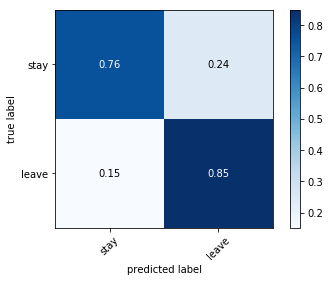

In [63]:
# Linear Classifier on Count Vectors
accuracy, cm = train_model(linear_model.LogisticRegression(), xtrain_tfidf_new, train_y_new, xvalid_tfidf_new, valid_y_new)
print("LR ACCURACY: ", str(round(accuracy, 2)))

df_cm = np.array(cm)
fig, ax = plot_confusion_matrix(conf_mat=df_cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=['stay', 'leave'])